In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
AW_BikeBuyer = pd.read_csv('C:/Users/user/Downloads/AW_BikeBuyer.csv')
AW_AMS = pd.read_csv('C:/Users/user/Downloads/AW_AveMonthSpend.csv')
AWC =  pd.read_csv('C:/Users/user/Downloads/AdvWorksCusts.csv')

In [3]:
AWC.shape

(16519, 23)

In [4]:
AW_AMS.shape

(16519, 2)

In [5]:
AW_BikeBuyer.shape

(16519, 2)

In [6]:
AW_BikeBuyer.head() #CustomerID that bought bike or not
AW_BikeBuyer.dtypes

CustomerID    int64
BikeBuyer     int64
dtype: object

In [7]:
AW_AMS.head() #CustomerID Average Spending
AW_AMS.dtypes

CustomerID       int64
AveMonthSpend    int64
dtype: object

In [8]:
AWC.head() #Customers details
AWC.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
dtype: object

In [9]:
AWC['HomeOwnerFlag'].value_counts()
AWC['NumberCarsOwned'].value_counts().sort_values()
AWC['TotalChildren'].value_counts()
#AWC['YearlyIncome'].value_counts()

0    4267
2    3184
1    3079
4    2271
3    1990
5    1728
Name: TotalChildren, dtype: int64

In [10]:
cols = AWC.columns
for col in cols:
    x =pd.isna(AWC[col]).unique()
    print(col,' ',x)

CustomerID   [False]
Title   [ True False]
FirstName   [False]
MiddleName   [False  True]
LastName   [False]
Suffix   [ True False]
AddressLine1   [False]
AddressLine2   [ True False]
City   [False]
StateProvinceName   [False]
CountryRegionName   [False]
PostalCode   [False]
PhoneNumber   [False]
BirthDate   [False]
Education   [False]
Occupation   [False]
Gender   [False]
MaritalStatus   [False]
HomeOwnerFlag   [False]
NumberCarsOwned   [False]
NumberChildrenAtHome   [False]
TotalChildren   [False]
YearlyIncome   [False]


In [11]:
Missing_columns = ['Title','MiddleName','Suffix','AddressLine2'] #Columns with missing values

In [12]:
AWCcopy = AWC.copy()
AWCcopy[pd.isna(AWCcopy['MiddleName'])==False]

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,1966-04-08,Bachelors,Professional,M,M,1,0,0,2,137947
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,1965-05-14,Bachelors,Professional,M,S,0,1,3,3,101141
6,11006,NaN,Janet,G,Alvarez,NaN,2612 Berry Dr,NaN,Matraville,New South Wales,...,1965-12-06,Bachelors,Professional,F,S,1,1,0,0,84756
9,11009,NaN,Shannon,C,Carlson,NaN,3839 Northgate Road,NaN,Hervey Bay,Queensland,...,1964-04-01,Bachelors,Professional,M,S,0,1,0,0,106399
10,11010,NaN,Jacquelyn,C,Suarez,NaN,7800 Corrinne Court,NaN,East Brisbane,Queensland,...,1964-02-06,Bachelors,Professional,F,S,0,1,0,0,81294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16513,18487,NaN,Tasha,J,Nath,NaN,4992 Yorba Linda,NaN,Sunbury,Victoria,...,1956-10-10,High School,Skilled Manual,F,S,0,2,0,2,72037
16514,13121,NaN,Latasha,E,Jimenez,NaN,7259 Birchwood,NaN,Melton,Victoria,...,1965-03-22,Bachelors,Professional,F,M,1,4,5,5,101542
16515,26100,NaN,James,Garner,Ptaszynski,NaN,7345 Kenwal Rd.,NaN,Shawnee,British Columbia,...,1936-04-02,Partial College,Professional,F,S,1,2,0,3,46549
16516,11328,NaN,Julian,M,Griffin,NaN,7398 Withersed Lane,NaN,Newton,British Columbia,...,1940-01-01,Bachelors,Management,M,M,1,2,0,5,133053


In [13]:
#Check for duplicates
AW_BikeBuyer.duplicated('CustomerID')

0        False
1        False
2        False
3        False
4        False
         ...  
16514     True
16515     True
16516     True
16517     True
16518     True
Length: 16519, dtype: bool

In [14]:
#Dropping duplicates in the dataset
AWC = AWC.drop_duplicates('CustomerID', keep='last')
AW_BikeBuyer = AW_BikeBuyer.drop_duplicates('CustomerID',keep='last')
AW_AMS = AW_AMS.drop_duplicates('CustomerID', keep='last')

In [15]:
print(AWC.shape); print(AW_AMS.shape); print(AWC.shape)

(16404, 23)
(16404, 2)
(16404, 23)


In [16]:
round(AW_AMS.describe(),4) #Description of the dataset

,CustomerID,AveMonthSpend
count,16404.0000,16404.0000
mean,20240.1431,72.3910
std,5340.3707,27.2699
min,11000.0000,22.0000
25%,15617.7500,52.0000
50%,20231.5000,68.0000
75%,24862.2500,84.0000
max,29482.0000,176.0000


In [17]:
#Checking for the class imbalance in the dataset
x = AW_BikeBuyer.iloc[:,1].value_counts()
print(x)
type(x)

0    10949
1     5455
Name: BikeBuyer, dtype: int64


pandas.core.series.Series

Occupation
Manual             21722.0
Clerical           49481.0
Skilled Manual     66471.5
Professional       99058.0
Management        118781.0
Name: YearlyIncome, dtype: float64


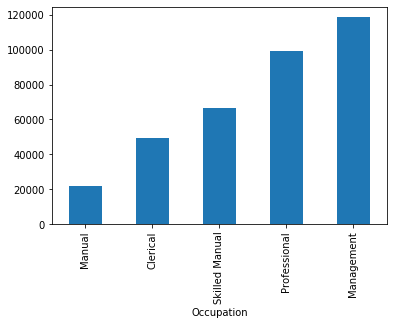

In [18]:
#Checking for the occupational group with the highest earning (YearlyIncome)
OccupationIncome = AWC.groupby('Occupation').YearlyIncome.median().sort_values(ascending=True)
print(OccupationIncome)
OccupationIncome.plot.bar()

In [19]:
xAWC = AWC.merge(AW_AMS, how='left', on='CustomerID')
#xAWC.head()
#Caulculating the Age of the Age of the customers/to get the age range of them
xAWC['BirthDate'] =  pd.to_datetime(xAWC['BirthDate'], format='%Y/%m/%d')
xAWC['CustomerAge']=(pd.to_datetime('1998-01-01') - xAWC['BirthDate']).astype(np.timedelta64(1,'Y'))

In [20]:
xAWC['CustomerAge']=xAWC['CustomerAge'].astype(np.int64)

In [21]:
xAWC['CustomerAge'].min(); xAWC['CustomerAge'].max(); xAWC['CustomerAge'].median()

34.0

In [22]:
#Age range the data to be grouped into
Age_group = {'A1':'Under 25','A2':'Between 25-45', 'A3':'Between 45-55','A4':'Over 55'}
#elif wouldn't work either
xAWC['CustomerAgegr']=['A1' if x<25 else 'A2' if (x>= 25 and x<=45) else 'A3' if (x>=45 and x<=55) else 'A4' for x in xAWC['CustomerAge']]
xAWC['CustomerAgegr']=[Age_group[x] for x in xAWC['CustomerAgegr']]
#for x in xAWC['CustomerAge']:
 #   if x<25:
  #      y = 'A1'
 #   elif x>= 25 and x<=45:
   #     y = 'A2'
  #  elif x>=45 and x<=55:
   #     y= 'A3'
   # elif x>55:

In [158]:
xAWC.head(); xAWC.tail()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,CustomerAge,CustomerAgegr
16399,13121,NaN,Latasha,E,Jimenez,NaN,7259 Birchwood,NaN,Melton,Victoria,...,F,M,1,4,5,5,101542,101,32,Between 25-45
16400,26100,NaN,James,Garner,Ptaszynski,NaN,7345 Kenwal Rd.,NaN,Shawnee,British Columbia,...,F,S,1,2,0,3,46549,46,61,Over 55
16401,11328,NaN,Julian,M,Griffin,NaN,7398 Withersed Lane,NaN,Newton,British Columbia,...,M,M,1,2,0,5,133053,79,58,Over 55
16402,23077,NaN,Marvin,A,Hernandez,NaN,1019 Book Road,NaN,Rhodes,New South Wales,...,M,M,1,2,0,4,31930,65,51,Between 45-55
16403,18982,NaN,Kyle,NaN,Baker,NaN,2118 Little Dr.,NaN,Kirkland,Washington,...,M,S,1,2,0,4,59382,68,52,Between 45-55


In [24]:
#Grouping based on highest value
xAWC.groupby(['Gender','CustomerAgegr'])['AveMonthSpend'].max()

Gender  CustomerAgegr
F       Between 25-45    114
        Between 45-55    110
        Over 55           93
        Under 25         112
M       Between 25-45    176
        Between 45-55    170
        Over 55          141
        Under 25         176
Name: AveMonthSpend, dtype: int64

In [25]:
#Grouping based on highest number of transactions
xAWC.groupby(['Gender','CustomerAgegr'])['AveMonthSpend'].count()

Gender  CustomerAgegr
F       Between 25-45    5066
        Between 45-55    1130
        Over 55           462
        Under 25         1456
M       Between 25-45    5206
        Between 45-55    1175
        Over 55           433
        Under 25         1476
Name: AveMonthSpend, dtype: int64

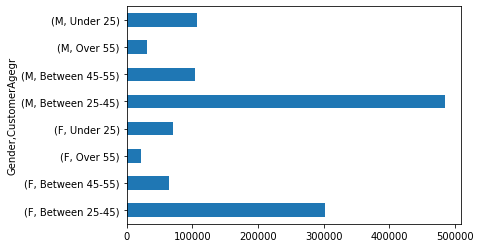

In [26]:
#Grouping based on highest spend values
gval=  xAWC.groupby(['Gender','CustomerAgegr'])['AveMonthSpend'].sum()
gval.plot.barh()

#### Assumption Confrimation
The Assumptions are tried out in order to select what is true abou the data, and which is not

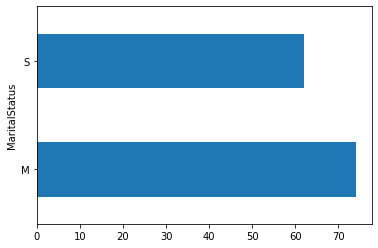

In [27]:
gmval=xAWC.groupby(['MaritalStatus']).AveMonthSpend.median()
gmval.plot.barh()

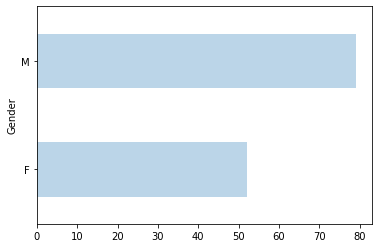

In [28]:
gmval=xAWC.groupby(['Gender']).AveMonthSpend.median()
gmval.plot.barh(alpha=0.3)

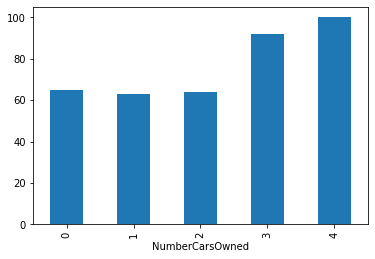

In [29]:
xAWC['NumberCarsOwned'].unique()
xAWC.groupby('NumberCarsOwned').AveMonthSpend.median().plot.bar()

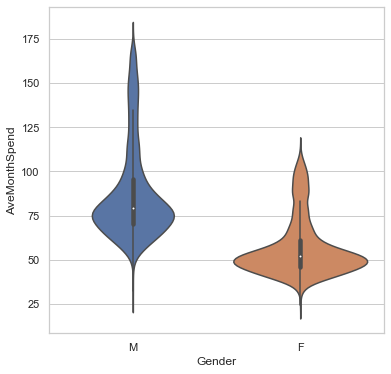

In [72]:
#Range of values for Average Month Spending between genders
violin_plot('Gender','AveMonthSpend')

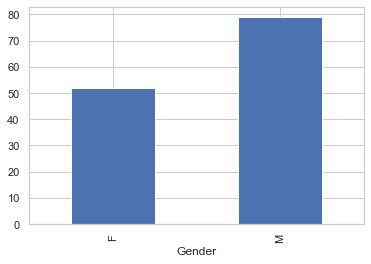

In [77]:
xAWC.groupby('Gender').AveMonthSpend.median().plot.bar()
#xAWC.groupby('Gender').AveMonthSpend.min().plot.bar()

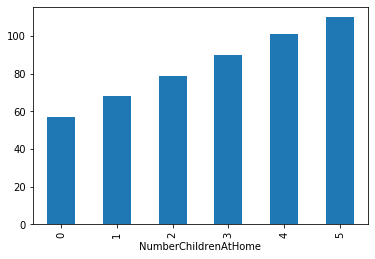

In [31]:
xAWC.groupby('NumberChildrenAtHome').AveMonthSpend.median().plot.bar()

In [32]:
#Merging the dataset completely to enable the workflow become better and easier
Dataset = xAWC.merge(AW_BikeBuyer, how='left', on ='CustomerID')
Dataset.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,CustomerAge,CustomerAgegr,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,M,1,0,0,2,137947,89,31,Between 25-45,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,S,0,1,3,3,101141,117,32,Between 25-45,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,M,1,1,3,3,91945,123,32,Between 25-45,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,S,0,1,0,0,86688,50,29,Between 25-45,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,S,1,4,5,5,92771,95,29,Between 25-45,1


In [159]:
Dataset[['BikeBuyer','CustomerAge']].groupby('BikeBuyer').count()
#There is a class imbalance. 33% if the data are for people who have refused to
#buy something to ride. 

,CustomerAge
BikeBuyer,
0,10949
1,5455


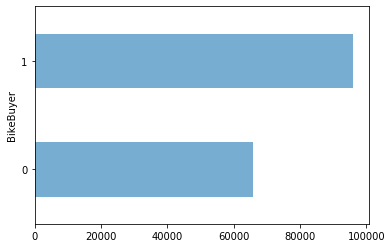

In [33]:
#Yearly Income on those who bought bicycle
Dataset.groupby('BikeBuyer').YearlyIncome.median().plot.barh(alpha=0.6)

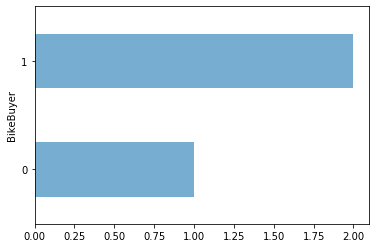

In [34]:
#Number of Cars owned on who bought bicycle and who didn't
Dataset.groupby('BikeBuyer').NumberCarsOwned.median().plot.barh(alpha=0.6)

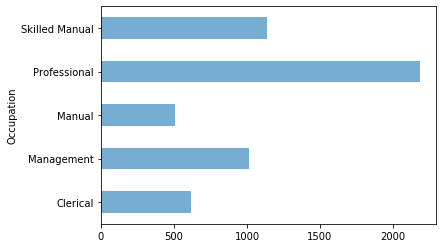

In [35]:
#Numbe rof people who bought bike based on profession
Dataset.groupby('Occupation').BikeBuyer.sum().plot.barh(alpha=0.6)

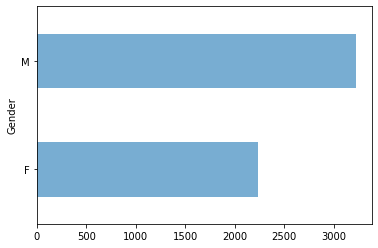

In [36]:
#Bike Purchase by Gender
Dataset.groupby('Gender').BikeBuyer.sum().plot.barh(alpha=0.6)

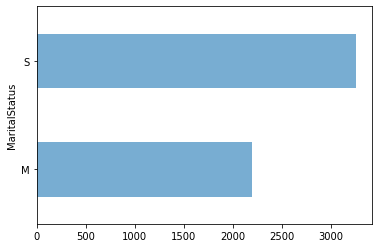

In [37]:
#Bike Purchase by Marital Status
Dataset.groupby('MaritalStatus').BikeBuyer.sum().plot.barh(alpha=0.6)

In [38]:
Dataset.to_csv('AW_dataset.csv', sep=',')

In [46]:
Dataset.groupby(['CountryRegionName']).BikeBuyer.sum()

CountryRegionName
Australia         1221
Canada             457
France             465
Germany            546
United Kingdom     614
United States     2152
Name: BikeBuyer, dtype: int64

In [43]:
Dataset.groupby(['CountryRegionName','StateProvinceName']).BikeBuyer.sum()

CountryRegionName  StateProvinceName  
Australia          New South Wales         523
                   Queensland              274
                   South Australia          72
                   Tasmania                 39
                   Victoria                313
Canada             Alberta                   3
                   British Columbia        454
France             Charente-Maritime         5
                   Essonne                  37
                   Garonne (Haute)           7
                   Hauts de Seine           38
                   Loir et Cher              3
                   Loiret                   18
                   Moselle                  14
                   Nord                     72
                   Pas de Calais             7
                   Seine (Paris)           102
                   Seine Saint Denis        80
                   Seine et Marne           15
                   Somme                     3
                   Va

In [62]:
def plot_box(col1, col2):
    import seaborn as sns
    sns.set(style='darkgrid', context='notebook')
    fig = plt.figure(figsize=(7,7))
    ax = fig.gca()
    sns.boxplot(col1,col2,data = Dataset, ax=ax)
    plt.ylabel(col2)
    ax.set_xlabel(col1)
    plt.show()
    

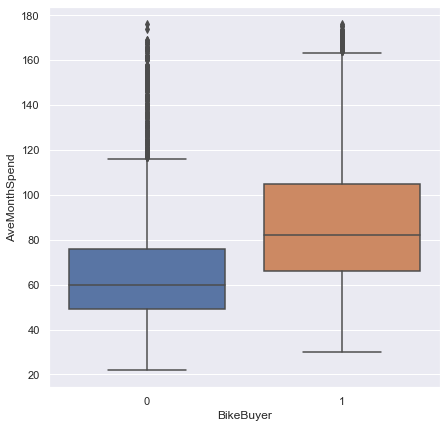

In [63]:
plot_box('BikeBuyer', 'AveMonthSpend')

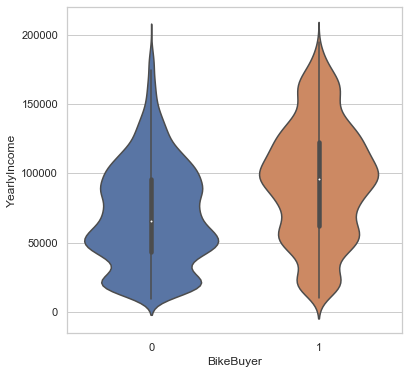

In [69]:
def violin_plot (col1,col2):
    import seaborn as sns
    sns.set(style='whitegrid')
    ax = plt.figure(figsize=(6,6)).gca()
    sns.violinplot(col1,col2, data=Dataset)
    ax.set_xlabel(col1)
    plt.ylabel(col2)
    plt.show()
    
violin_plot ('BikeBuyer', 'YearlyIncome')
#The median Yearly Income of BikeBuyers are significantly higher to those
#don't buy.


### Class separation by Numeric features

In [163]:
num_features = ['NumberCarsOwned','NumberChildrenAtHome','TotalChildren',
               'YearlyIncome','AveMonthSpend','CustomerAge']

In [164]:
def boxplot(col1):
    import seaborn as sns
    for col in col1:
        sns.set(style='darkgrid')
        ax =  plt.figure(figsize=(7,7)).gca()
        sns.boxplot('BikeBuyer', col, data=Dataset)
        ax.set_ylabel(col)
        ax.set_xlabel("BikeBuyer")
        plt.title('Riders and Nun-Riders by \n'+col)
        plt.show()

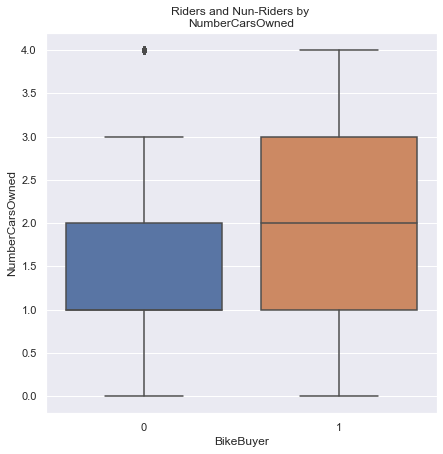

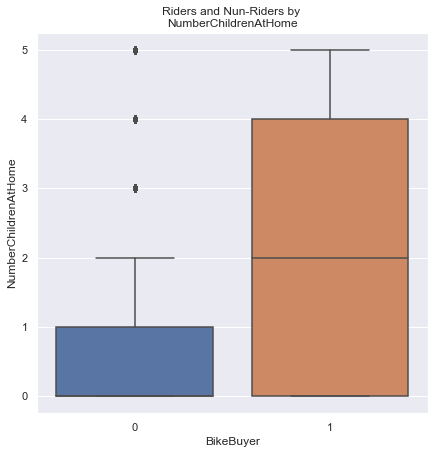

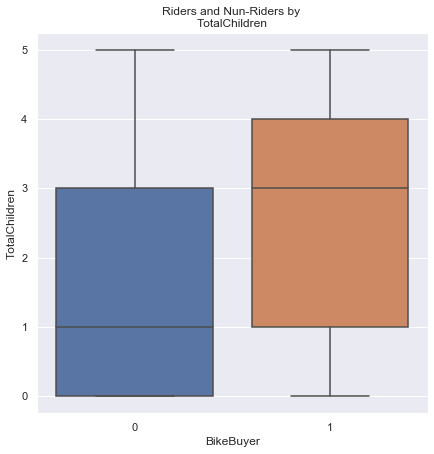

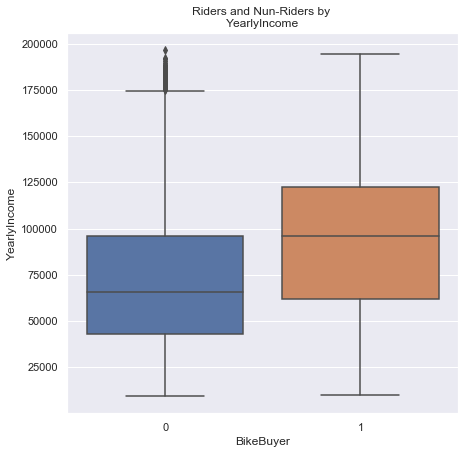

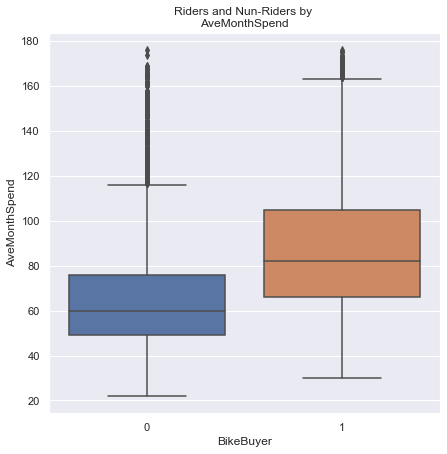

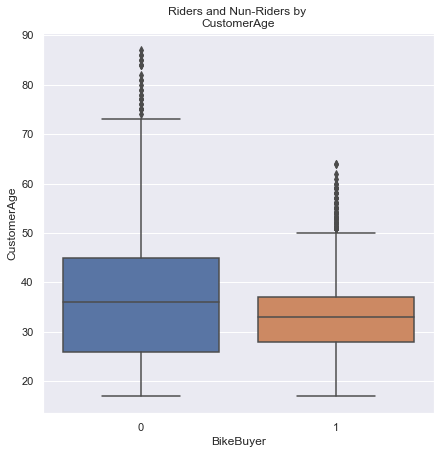

In [165]:
boxplot(num_features)
#Is there any sufficient or significant differences between the interquartiles
#of the distributions?

#1 NumberCarsOwned(Those who own cars usually like to stay mobile) median of 2cars
#NumberofChildren at home determines if they buy bicycle or not. (median = 2.0)
#2 TotalChildren (median=3.0) gets to buy bicycle
#3 YearlyIncome lesser effect, #4AveMOnthSpend (generally those who spend more get to buy bicycles)

#4 Customer age has been accounted for in the age group calculation and effect
#HomeOwningflag to be calculated 

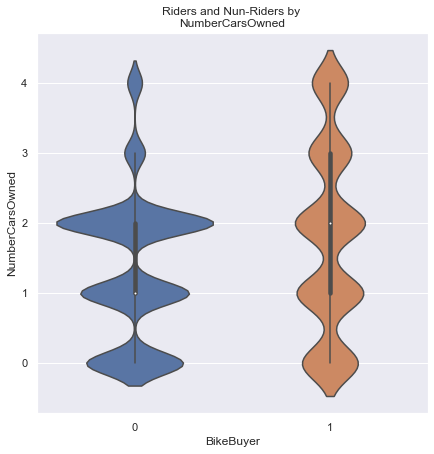

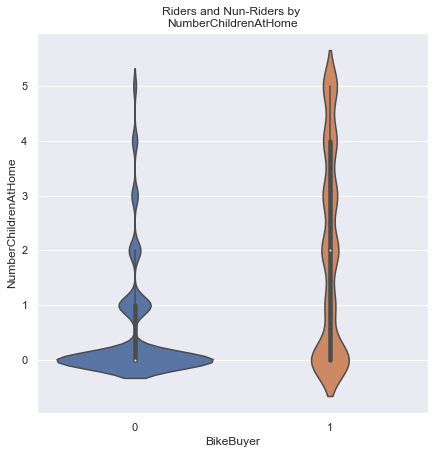

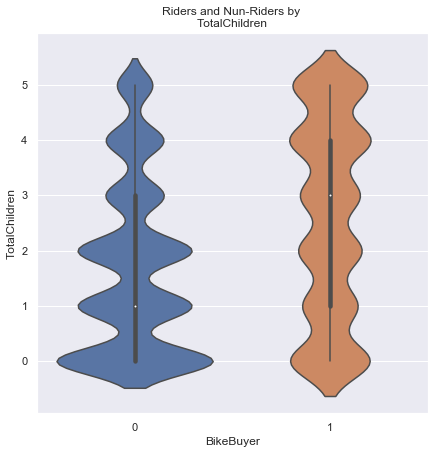

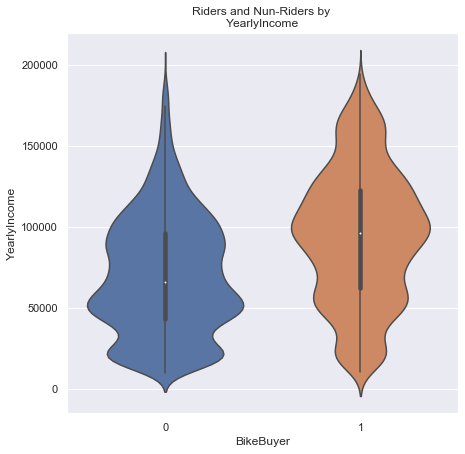

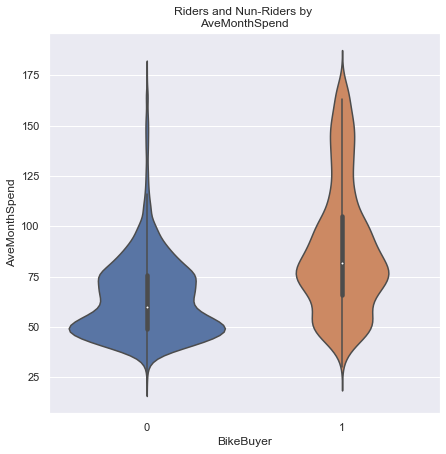

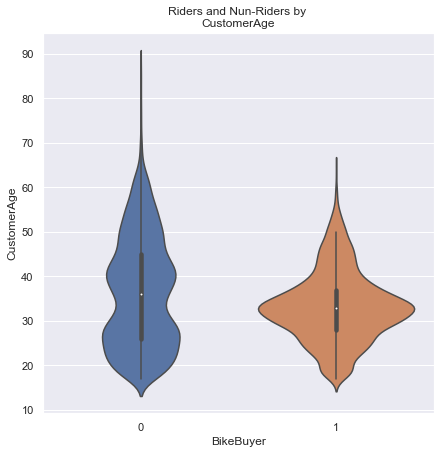

In [169]:
def plotviolin(col1):
    import seaborn as sns
    for col in col1:
        sns.set(style='darkgrid')
        ax =  plt.figure(figsize=(7,7)).gca()
        sns.violinplot('BikeBuyer', col, data=Dataset)
        ax.set_ylabel(col)
        ax.set_xlabel("BikeBuyer")
        plt.title('Riders and Nun-Riders by \n'+col)
        plt.show()
plotviolin(num_features)

In [ ]:
#Violin plots to confirm what was inferred from the Boxplots

#The number of cars difference is significant. because of the distribution
#Those with no children tend not to buy bicycle
#Use the children at home over Total children as a feature

**1** Parameters to help in the classification of customers likely to buy the bicycle and those not like to buy

 ### Class separation by categorical features

In [90]:
Dataset['dummmy'] =1

In [176]:
counts =  Dataset[['dummmy','BikeBuyer', 'HomeOwnerFlag']].groupby(['BikeBuyer','HomeOwnerFlag'], as_index=False).count()
counts

,BikeBuyer,HomeOwnerFlag,dummmy
0,0,0,3569
1,0,1,7380
2,1,0,1777
3,1,1,3678


Text(0.5, 1.0, 'Did not Buy Bicycle')

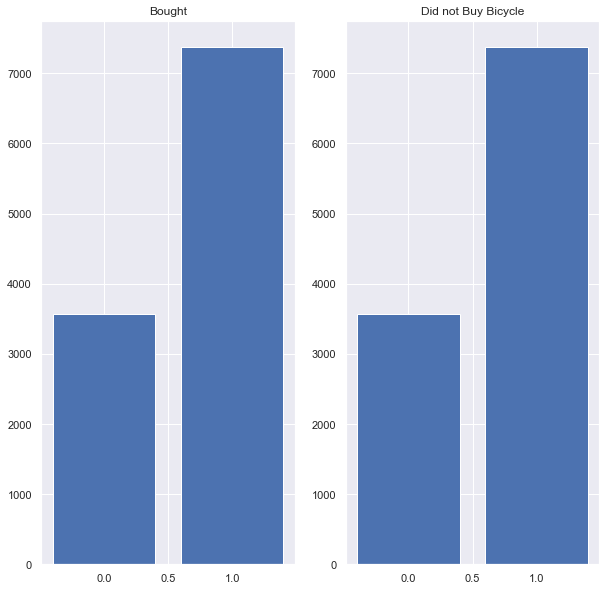

In [178]:
temp = counts[counts['BikeBuyer']==0][['HomeOwnerFlag','dummmy']]
teemp = counts[counts['BikeBuyer']==0][['HomeOwnerFlag','dummmy']]
a = plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.bar(temp['HomeOwnerFlag'], temp['dummmy'])
plt.title('Bought')
plt.subplot(1,2,2)
plt.bar(teemp['HomeOwnerFlag'], temp['dummmy'])
plt.title('Did not Buy Bicycle')

In [170]:
cat_cols =Dataset.columns[[8,9,10,14,15,16,17,-3]] #,18
cat_cols

Index(['City', 'StateProvinceName', 'CountryRegionName', 'Education',
       'Occupation', 'Gender', 'MaritalStatus', 'CustomerAgegr'],
      dtype='object')

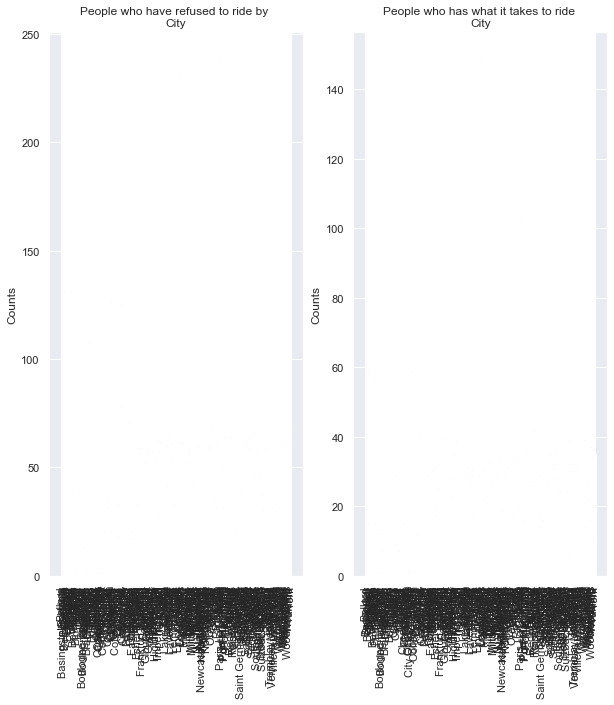

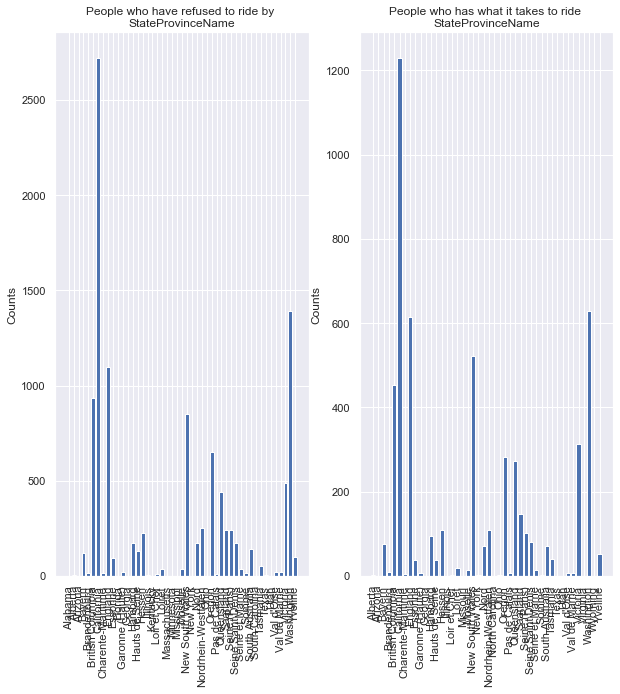

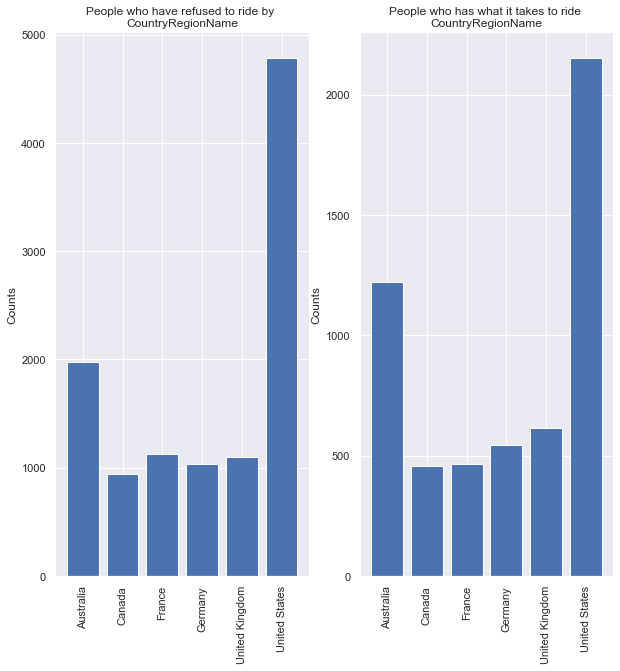

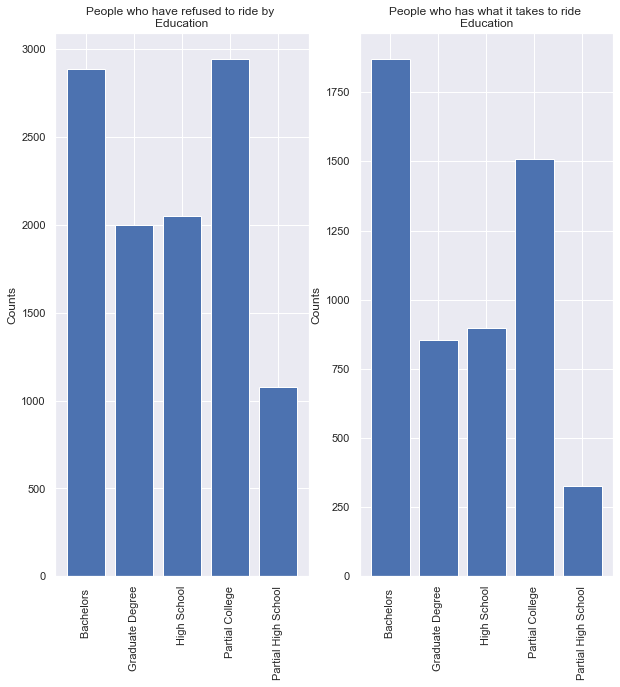

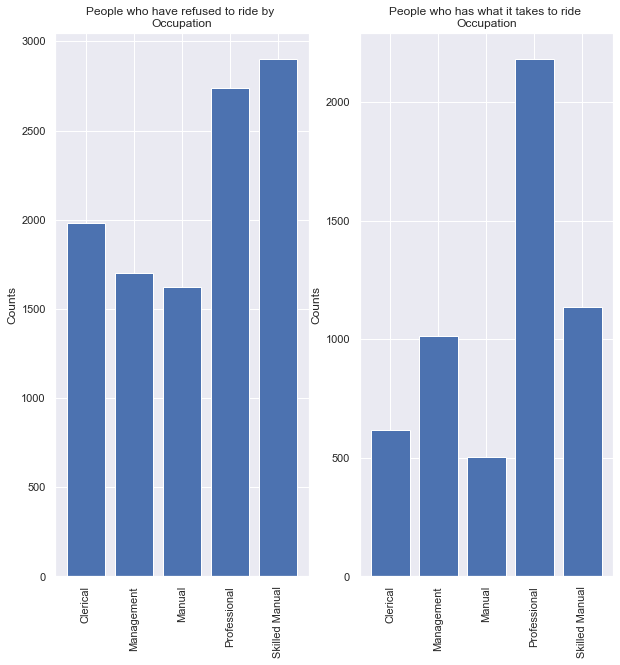

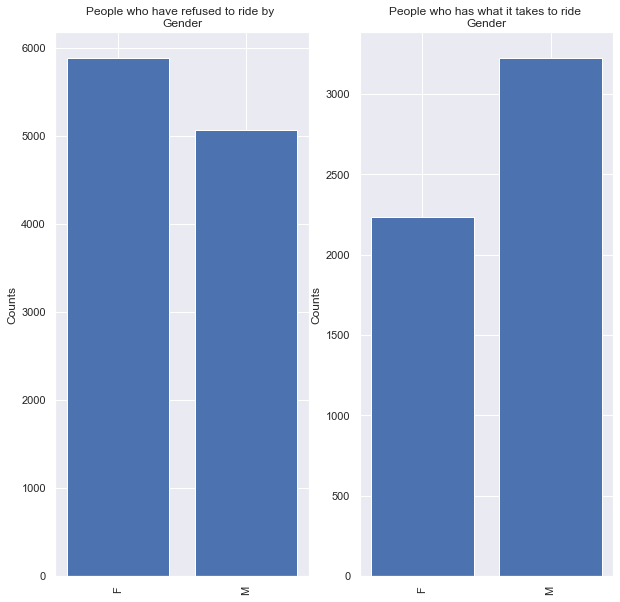

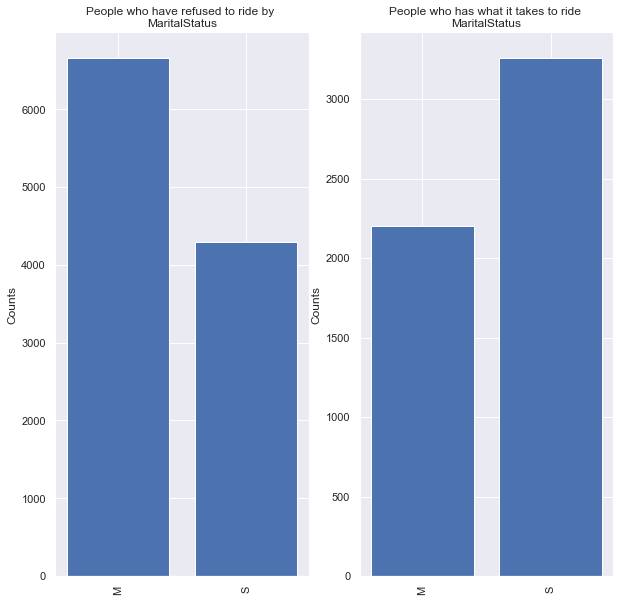

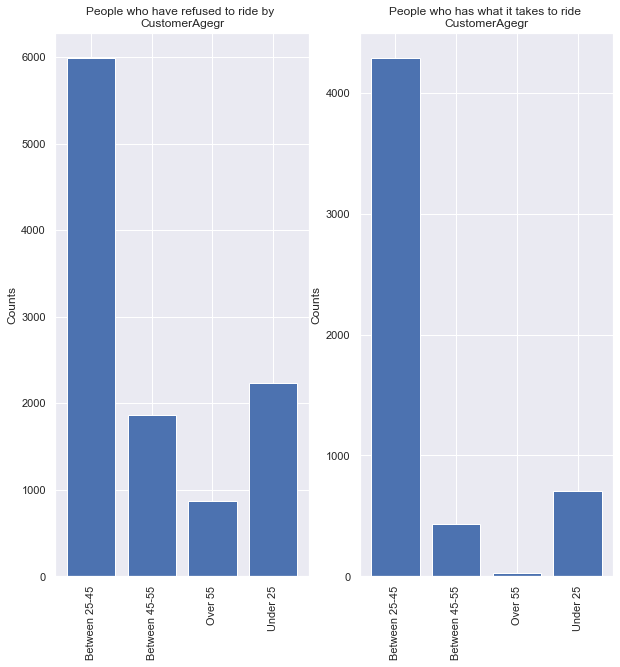

In [171]:
for cols in cat_cols:
    count = Dataset[['BikeBuyer',cols,'dummmy']].groupby(['BikeBuyer',cols], as_index=False).count()
    temp = count[count['BikeBuyer']==0][[cols,'dummmy']]
    a = plt.figure(figsize = (10,10))
    plt.subplot(1,2,1)
    #temp = count[count['BikeBuyer']==0][[cols,'dummmy']]
    plt.bar(temp[cols],temp['dummmy'])
    plt.ylabel('Counts')
    plt.xticks(rotation=90)
    plt.title('People who have refused to ride by \n' + cols)
    plt.subplot(1,2,2)
    temp = count[count['BikeBuyer']==1][[cols,'dummmy']]
    plt.bar(temp[cols],temp['dummmy'])
    plt.ylabel('Counts')
    plt.xticks(rotation=90)
    plt.title('People who has what it takes to ride \n' + cols)
    plt.show()
    

**1** The city lived in, educational level,occupation,gender,age group  shows a significant variation from the plots therefore, it'll have an effect in separating the class

**2** CountryRegionName,and MaritalStatus shows a little variation. However, would affect the model a little. There is a dominant group

**3** StateProvineName is not useful, and HomeOwnerFlag show no difference in separating Bicycle and Nun Bicycle Riders